In [1]:
library(pheatmap)
library(readr)
library(tibble)

In [12]:
# list files in filter_interactions directory
corr_files = list.files("filter_interactions")
corr_files

[1] "Astro_corr.csv"     "Exc_deep_corr.csv"  "Exc_int_corr.csv"  
[4] "Exc_upper_corr.csv" "Inh_corr.csv"       "Microglia_corr.csv"
[7] "Oligo_corr.csv"     "OPC_corr.csv"

[1] "Astro"
[1] "Exc_deep"


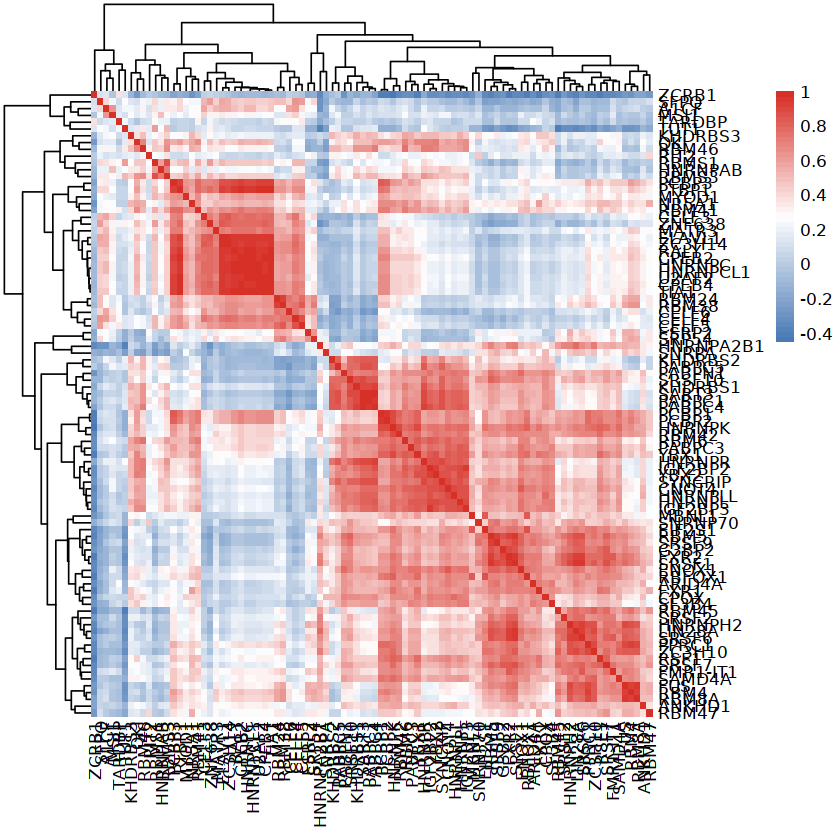

[1] "Exc_int"


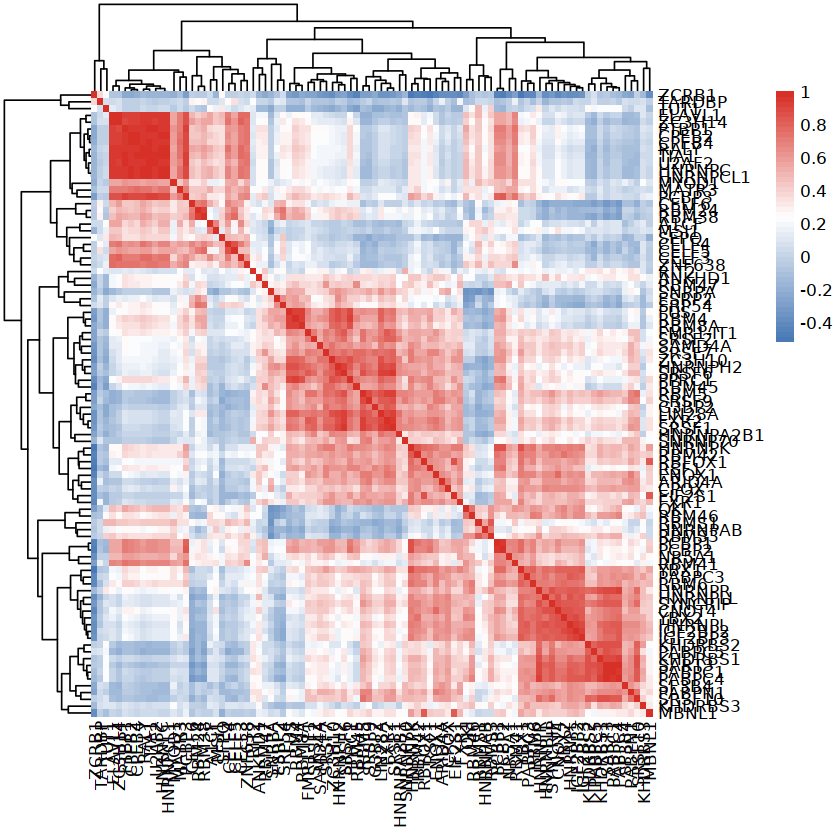

[1] "Exc_upper"


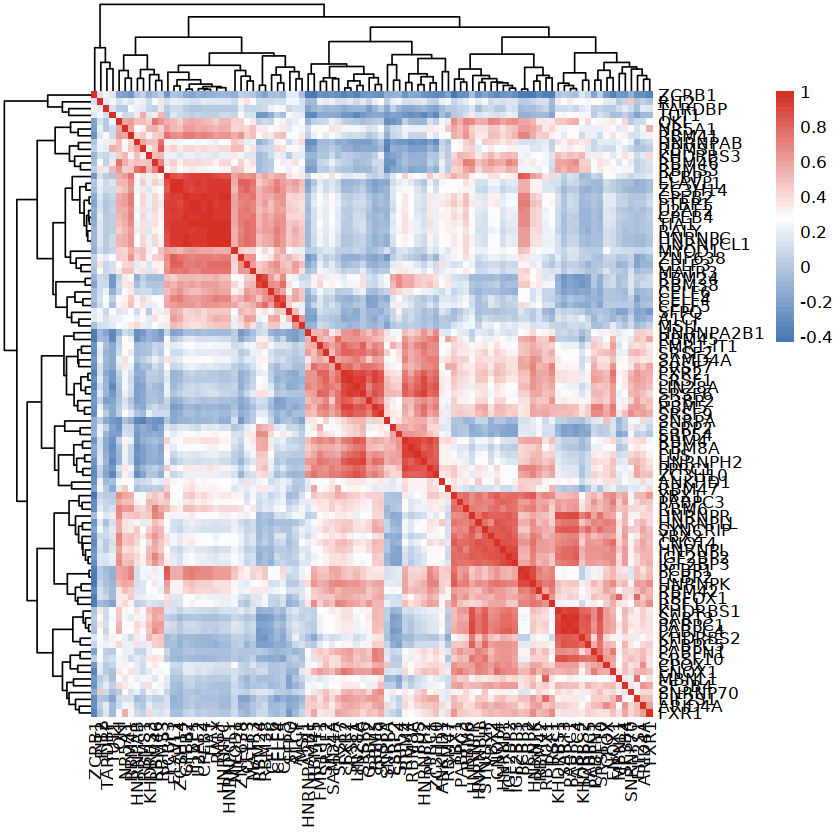

[1] "Inh"


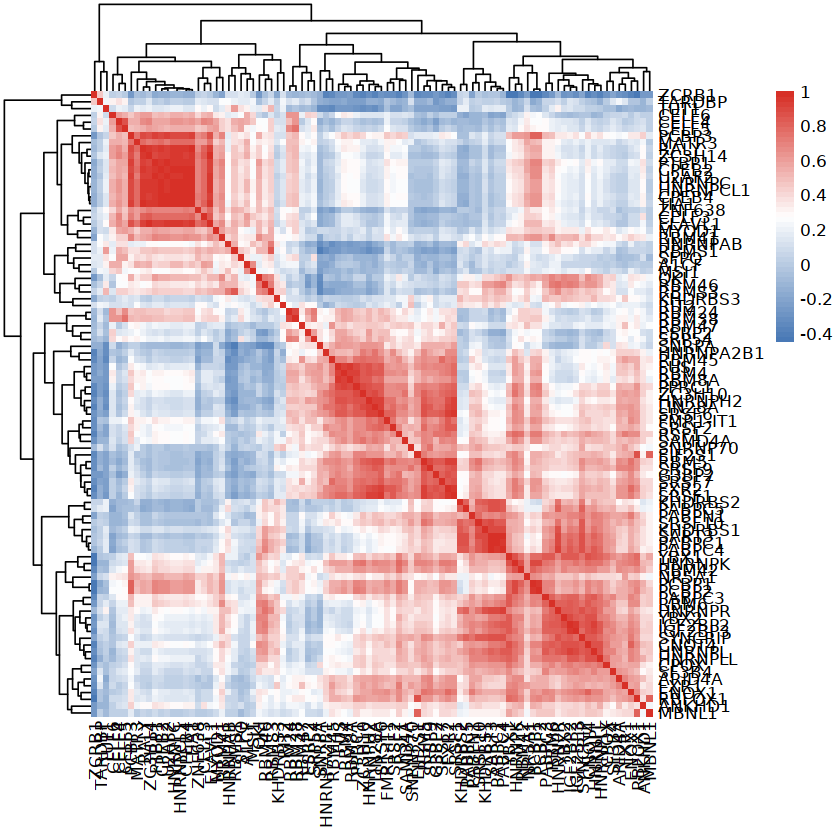

[1] "Microglia"


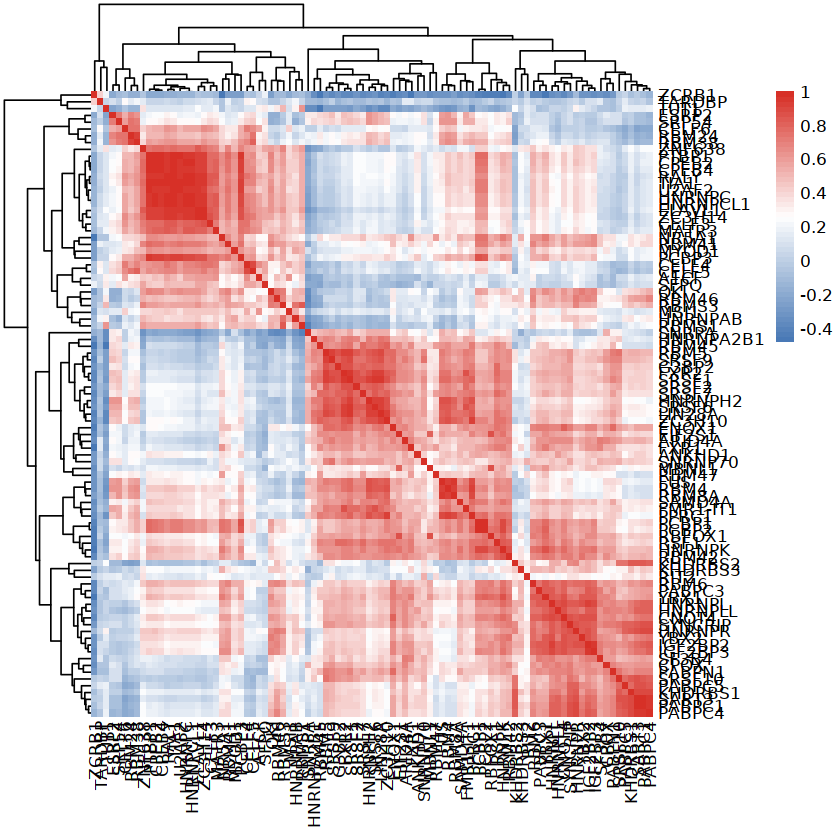

[1] "Oligo"


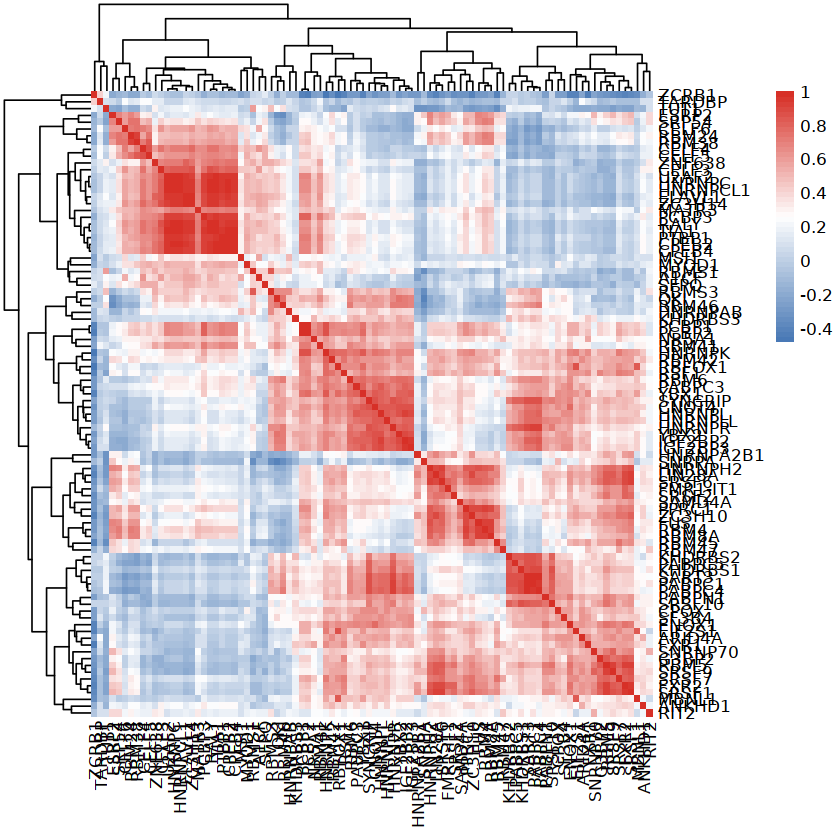

[1] "OPC"


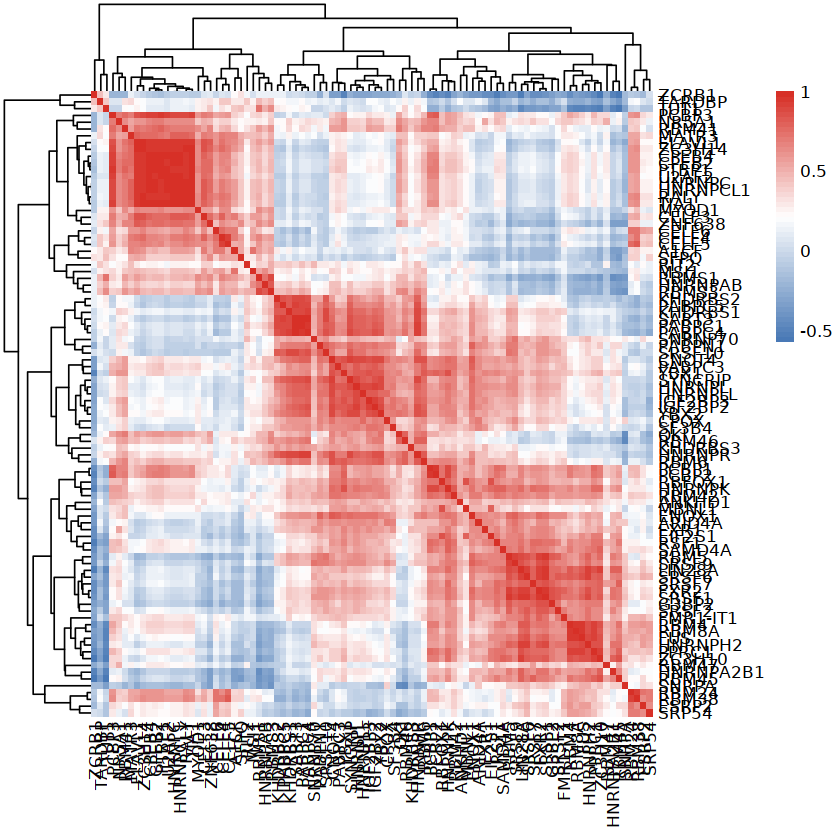

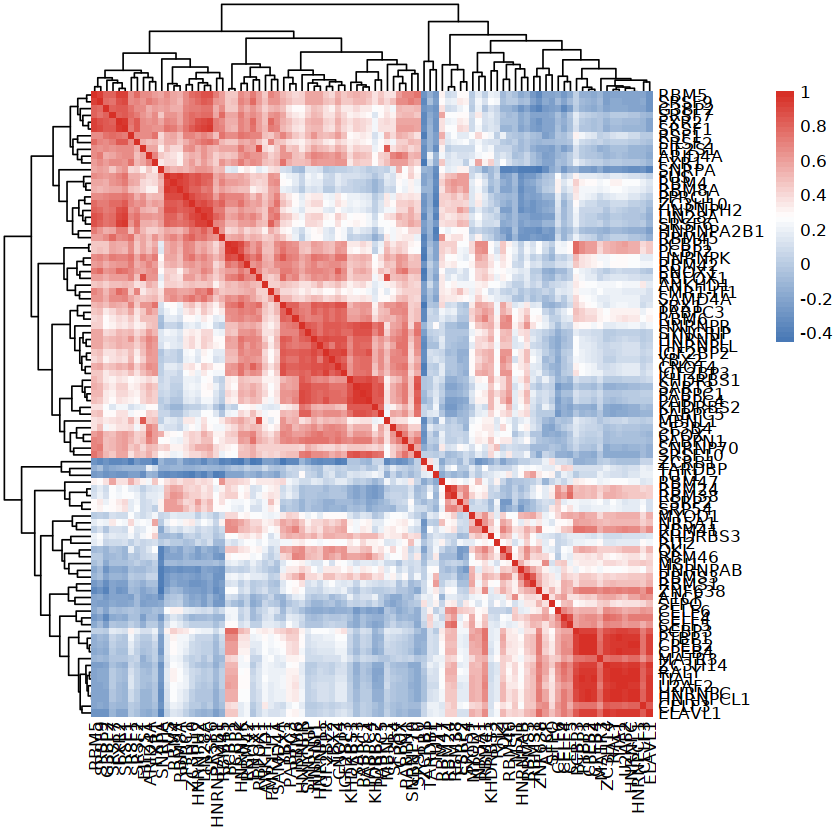

In [13]:
for (file in corr_files) {
  # read in the correlation matrix
    ct_name = strsplit(file, "_corr.csv")[[1]][1]
    print(ct_name)
    corr_matrix = read_csv(paste("filter_interactions/", file, sep=""),col_types = cols(.default = "c")) 
    corr_matrix <- corr_matrix %>% column_to_rownames(var = "RBP")
    corr_matrix[] <- lapply(corr_matrix, as.numeric)
    rownames(corr_matrix) <- rownames(corr_matrix)
    plt <- pheatmap(corr_matrix, color = colorRampPalette(c("#4979B6", "white", "#D73027"))(50),
                            border_color = NA, angle_col = 90)
    pdf(file=paste0("filter_interactions_pdfs/", ct_name, "_RBP_intn_cormat.pdf"), height = 11.5, width = 11.5)
    print(plt)
    dev.off()
}